In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import json
import time
from code.data_utils import get_token, get_auth_header, get_playlist_tracks, get_audio_features, get_audio_analysis, get_audio_analysis_item
from code.audio_analysis_utils import sliding_diff, pairwise_sliding_diffs, pairwise_fastdtw, pairwise_sliding_fastdtw, pairwise_diffs, resample_to_match_length


token=get_token()
print(token)
headers = get_auth_header(token)

track_audio_feats = pd.read_csv('./data/AudioFeats_Eostre.csv')
audio_analysis_df = pd.read_csv('./data/aud_analys_data_Eostre.csv')
track_audio_feats.head()

5835805e22a345948373bd954162324c 6ccb11160d65423c96d93038b719b902
BQBpyGP9i04X-gN83SamUhCcNVAP6q_7ia4OCSLjHm08blD6XlpOtG72ULMddapM7iYomHzQ_cc7qKvkeIMu14VG6XuGqNTP5Z8ZDTgdarHo5MyQoL8


,artist_name,artist_id,track_name,track_id,track_popularity,time_signature,duration_ms,tempo,valence,liveness,instrumentalness,acousticness,speechiness,mode,loudness,key,energy,danceability
0,Austra,1o43SzzuLoyOxqThmp7s0g,Lose It,3aY3gBVJ9rc104V1nRHiPa,45,4,270707,138.015,0.494,0.126,0.08620,0.331000,0.0266,1,-7.176,5,0.554,0.596
1,Austra,1o43SzzuLoyOxqThmp7s0g,Energy,2hMdfTCcIQGdn35nlnCFiq,18,4,237597,110.010,0.462,0.174,0.65900,0.002100,0.0356,0,-4.650,2,0.870,0.566
2,Austra,1o43SzzuLoyOxqThmp7s0g,Spellwork,2f3BbVM1AAzTKc31EKZpYj,39,4,309653,119.985,0.221,0.439,0.15600,0.000019,0.0275,0,-7.565,2,0.713,0.563
3,Austra,1o43SzzuLoyOxqThmp7s0g,Beat and The Pulse - Still Going remix,6McBCPHWyuGV3JJjHnQ74y,9,4,366867,117.983,0.837,0.077,0.32900,0.043000,0.0595,1,-8.973,0,0.833,0.763
4,Austra,1o43SzzuLoyOxqThmp7s0g,Anywayz - Avalon Emerson's 14th Life Version,0uUMRuyu9EukwtJAW81m3e,29,4,359107,127.999,0.127,0.393,0.00418,0.065000,0.0379,0,-11.145,7,0.410,0.755


In [2]:
# playlist_id = '40kxdSQcF4GD2myX4eqk6J'
# tracks_info = get_playlist_tracks(token, playlist_id, summarize=True)
# tracks_info

In [3]:
# audio_feats = get_audio_features(token=token, track_ids=tracks_info.track_id.tolist())
# audio_feats = pd.DataFrame(audio_feats)
# track_audio_feats = pd.concat([tracks_info, audio_feats._get_numeric_data()], axis=1)
# track_audio_feats

In [5]:
# audio_analysis_df = get_audio_analysis(token, tracks_info.track_id.tolist(), tracks_info.track_name.tolist(), sleep_range=(1,3))
# audio_analysis_df

In [2]:
audio_items = get_audio_analysis_item(audio_analysis_df, items=['timbre', 'pitches'])
timbre_vals = audio_items['timbre']
pitch_vals = audio_items['pitches']

# scale_max = np.max(np.concatenate(timbre_vals,axis=0), axis=0)
# scale_min = np.min(np.concatenate(timbre_vals,axis=0), axis=0)

# d=2
# timbre_vals_first_d = [t[:,:d] for t in timbre_vals]
# pitch_vals_first_d = [p[:,:d] for p in pitch_vals]

(array([  1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   3.,   8.,  11.,
         20.,  40.,  81., 100., 124., 198., 247., 320., 355., 462., 518.,
        548., 627., 642., 665., 673., 708., 737., 668., 717., 606., 573.,
        571., 588., 518., 487., 434., 396., 375., 306., 256., 263., 213.,
        180., 157., 153., 109., 110.,  94.,  81., 106.,  82.,  65.,  60.,
         55.,  47.,  56.,  43.,  34.,  24.,  28.,  23.,  35.,  21.,  13.,
         24.,  12.,  14.,  19.,   6.,   8.,   7.,   3.,   5.,   3.,   2.,
          2.,   1.,   2.,   1.,   2.,   2.,   1.,   1.,   2.]),
 array([0.        , 0.00119444, 0.00238887, 0.00358331, 0.00477774,
        0.00597218, 0.00716662, 0.00836105, 0.00955549, 0.01074992,
        0.01194436, 0.01313879, 0.01433323, 0.01552767, 0.0167221 ,
        0.01791654, 0.01911097, 0.02030541, 0.02149985, 0.02269428,
        0.02388872, 0.02508315, 0.02627759, 0.02747202, 0.02866646,
    

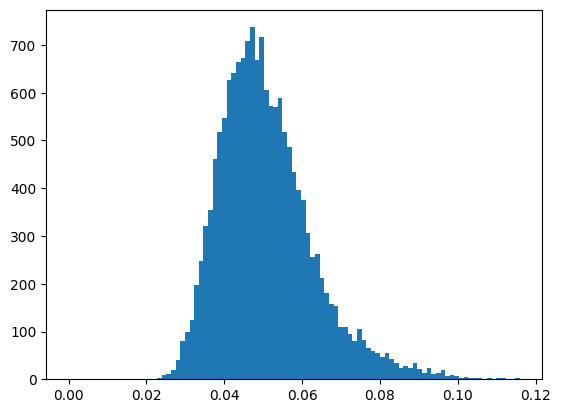

In [3]:
D_timbre = pairwise_diffs(timbre_vals, resample=True, interpol_method='nearest', minmax_scale = True)
D_pitch = pairwise_diffs(pitch_vals, resample=True, interpol_method='nearest', minmax_scale = True)
plt.hist(D_timbre[~np.isinf(D_timbre)], bins='auto')

(array([  1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,
          2.,   0.,   0.,   0.,   0.,   1.,   0.,   4.,   1.,   1.,   4.,
          5.,   6.,   6.,   5.,   2.,   9.,  12.,  15.,  18.,  21.,  20.,
         19.,  35.,  46.,  48.,  46.,  65.,  68., 102., 118., 152., 162.,
        198., 229., 269., 338., 369., 402., 456., 514., 580., 587., 583.,
        712., 679., 699., 679., 652., 669., 632., 599., 517., 500., 489.,
        446., 415., 387., 335., 284., 224., 208., 175., 175., 146., 123.,
         83.,  70.,  59.,  58.,  43.,  40.,  26.,  15.,  18.,  14.,  11.,
          7.,   9.,   3.,   4.,   4., 

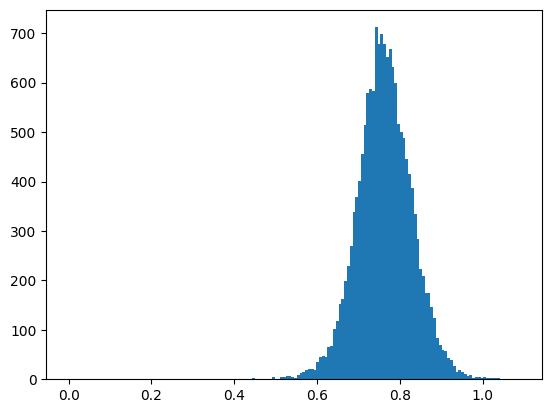

In [122]:
D_pitch = pairwise_diffs(pitch_vals, resample=True, interpol_method='nearest', minmax_scale = True)
plt.hist(D_pitch[~np.isinf(D_pitch)], bins='auto')

In [4]:
# D_timbre_dtw = pairwise_fastdtw(timbre_vals, radius=1, dist=2,  resample=True, interpol_method = 'nearest', minmax_scale=True)
# plt.hist(D_timbre_dtw[~np.isinf(D_timbre_dtw)], bins='auto')

In [5]:
# # D_pitch = pairwise_diffs(pitch_vals_first_d, resample=True, interpol_method='nearest',  minmax_scale = False)
# D_pitch_dtw = pairwise_fastdtw(pitch_vals, radius=1, dist=2,  resample=True, interpol_method = 'nearest', minmax_scale=True)
# plt.hist(D_pitch_dtw[~np.isinf(D_pitch_dtw)], bins='auto')

In [58]:
def get_outlier_cutoff(arr):
    arr = arr[arr>0]
    print(arr.min())
    print(arr.max())
    # Calculate the first and third quartiles (Q1 and Q3)
    Q1 = np.percentile(arr, 25)
    Q3 = np.percentile(arr, 75)
    
    # Calculate the interquartile range (IQR)
    IQR = Q3 - Q1
    
    # Define the lower and upper bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    return lower_bound, upper_bound

In [123]:
D = D_timbre + D_pitch

lower, upper = get_outlier_cutoff(D[~np.isinf(D)].flatten())
print(lower, upper)

0.3637228547380942
1.1850312936686982
0.6333967170761406 0.9946359084055786


In [126]:
lower=np.percentile(D[(~np.isinf(D))&(D>0)], 1)
print(lower)
low_diffs = D.flatten()[D.flatten()<lower]
ix_inspect_low = [np.unravel_index(ix, D.shape) for ix in np.where(D.flatten()<lower)[0]]
ix_inspect_low = [ix for _, ix in sorted(zip(low_diffs, ix_inspect_low))]
inpect_X = track_audio_feats.iloc[list(sum(ix_inspect_low, ())),:].copy()
inpect_X.insert(0, 'pair', list(sum([2*[i]for i in range(len(ix_inspect_low))], [])))
inpect_X.head(16)

0.6463881438628475


,pair,artist_name,artist_id,track_name,track_id,track_popularity,time_signature,duration_ms,tempo,valence,liveness,instrumentalness,acousticness,speechiness,mode,loudness,key,energy,danceability
160,0,Sam Quealy,0GLGeVG3XTA2KmlmAd05T8,Watch Me Now (Queen of the night),4MOIEJR5YLM10ZKmhn7yrZ,35,4,192187,130.020,0.628,0.2460,0.000254,0.020500,0.0365,1,-5.451,0,0.7230,0.686
161,0,Sam Quealy,0GLGeVG3XTA2KmlmAd05T8,Watch Me Now,1NEXEw8ZdsMdnoVTQbkbTo,45,4,192187,130.020,0.628,0.2460,0.000254,0.020500,0.0365,1,-5.451,0,0.7230,0.686
81,1,Nina Kraviz,1oZmFNkGAT93yD1xX4vTRE,I'm Gonna Get You,1LaZ2aGugrXacj39qCnSQU,0,4,598081,119.999,0.652,0.0707,0.651000,0.049000,0.0771,0,-9.552,4,0.5180,0.808
151,1,Nina Kraviz,1oZmFNkGAT93yD1xX4vTRE,I'm Gonna Get You,4Tv3LlZQWvl5AC4t2p6tdc,44,4,598093,120.003,0.655,0.0707,0.655000,0.049000,0.0765,0,-9.549,4,0.5190,0.808
70,2,Soldout,5g40eoVT3f0lZbIa1mGbzs,Fake - Maya Postepski Remix,03EzjNFCjhIt94UbjNF5fz,5,4,395218,124.016,0.136,0.0799,0.006210,0.004830,0.0292,1,-4.801,1,0.8630,0.618
121,2,Scratch Massive,5udXThiZTVoHa4g0GDjgxA,Take me there feat. Jimmy Somerville - Acid Wa...,0Wk1lCubfKP4FTrQ9rteLv,1,4,371051,109.968,0.151,0.1630,0.849000,0.026600,0.0306,1,-9.544,0,0.5060,0.478
121,3,Scratch Massive,5udXThiZTVoHa4g0GDjgxA,Take me there feat. Jimmy Somerville - Acid Wa...,0Wk1lCubfKP4FTrQ9rteLv,1,4,371051,109.968,0.151,0.1630,0.849000,0.026600,0.0306,1,-9.544,0,0.5060,0.478
171,3,Death In Vegas,5aj3LEYRbuaabjjHkj5oE1,Your Loft My Acid - Fearless Transhouse Single...,3VEzJq61QhUKUydxuenyui,17,4,191400,107.982,0.165,0.5260,0.266000,0.000933,0.0302,1,-9.115,7,0.5470,0.616
70,4,Soldout,5g40eoVT3f0lZbIa1mGbzs,Fake - Maya Postepski Remix,03EzjNFCjhIt94UbjNF5fz,5,4,395218,124.016,0.136,0.0799,0.006210,0.004830,0.0292,1,-4.801,1,0.8630,0.618
171,4,Death In Vegas,5aj3LEYRbuaabjjHkj5oE1,Your Loft My Acid - Fearless Transhouse Single...,3VEzJq61QhUKUydxuenyui,17,4,191400,107.982,0.165,0.5260,0.266000,0.000933,0.0302,1,-9.115,7,0.5470,0.616


In [582]:
def count_sign_changes(x):
    # Compute sign changes using NumPy's vectorized operations
    sign_changes = np.sum(x[:-1] * x[1:] > 0)

    return sign_changes

def count_positive_to_negative(x):
    # Compute sign changes from positive to negative using NumPy's vectorized operations
    positive_to_negative = np.sum((x[:-1] > 0) & (x[1:] < 0))

    return positive_to_negative


def get_pulse(x):
    return ((x[:-1] > 0) & (x[1:] < 0)).astype(np.int32)

In [530]:
audio_analysis_df[audio_analysis_df.track_id=='01h4GiasOM9OqztIlAbUdJ'].duration.median()

array([[False, False, False, ..., False, False,  True],
       [False, False,  True, ..., False, False,  True],
       [ True, False, False, ..., False, False, False],
       ...,
       [False,  True,  True, ...,  True, False, False],
       [False,  True, False, ...,  True, False,  True],
       [ True,  True,  True, ...,  True, False,  True]])

In [605]:
np.diff(plty[:10,0], axis=0, prepend=0)

array([  1.033,  39.036, -16.239,  -3.838,  22.534,  -2.01 , -15.773,
        -4.213,  20.166,  -0.921])

In [628]:
plty[:10,0]

array([1.   , 1.   , 0.064, 0.016, 0.13 , 1.   , 0.062, 0.025, 0.14 ,
       1.   ])

In [599]:
count_positive_to_negative(np.diff(plty, axis=0,  prepend=0)[:10,0])

3

In [662]:
durations[:10]

array([0.28685, 0.13039, 0.13188, 0.55098, 0.28707, 0.13265, 0.12059,
       0.56766, 0.25243, 0.15859])

In [665]:
get_pulse(np.diff(plty, axis=0,  prepend=0))[:10,0]


array([0, 1, 0, 0, 1, 0, 0, 0, 1, 0], dtype=int32)

In [627]:
plty = pitch_vals[126]
durations = audio_analysis_df[audio_analysis_df.track_id=='01h4GiasOM9OqztIlAbUdJ'].duration.values[1:]

In [799]:
plty = timbre_vals[126][:,0]
durations = audio_analysis_df[audio_analysis_df.track_id=='01h4GiasOM9OqztIlAbUdJ'].duration.values[1:]

In [688]:
get_pulse(np.diff(plty,  prepend=0)).astype(bool)


array([False,  True, False, False,  True, False, False, False,  True])

In [963]:
def get_pulse(x):
    diffs = np.diff(x,  prepend=0)
    # print(diffs)
    return ((diffs[:-1] > 0) & (diffs[1:] < 0)).astype(np.int32)

pulses = get_pulse(plty)
# print(pulses)

# Find the indices where the pulses occur
pulse_indices = np.where(pulses == 1)[0]
pulse_indices = np.insert(pulse_indices, 0, 0)
# print(pulse_indices)

# Calculate the cumulative sum of durations up to each pulse index
cumulative_durations = np.cumsum(durations)

# Prepend a zero to include the cumulative duration before (and including) the first pulse
# durations_w_zero = np.insert(durations, 0, 0)
pulse_durations = cumulative_durations[pulse_indices]
# pulse_durations = np.insert(pulse_durations, 0, 0)

# Calculate the sum of durations between each pair of consecutive pulse indices
sum_durations_between_pulses = np.diff(pulse_durations)

73.13206719259617

In [977]:
def get_pulse(x):
    diffs = np.diff(x, axis=0, prepend=0)
    # print(diffs)
    return ((diffs[:-1] > 0) & (diffs[1:] < 0)).astype(np.int32)

In [1007]:
x = pitch_vals[126]
pulses = get_pulse(x)
print(pulses.sum(0)*60/total_time)
print(pulses.sum(0)*np.median(durations))

[93.05659324 68.15093568 75.16980281 85.3584809  66.11320006 79.92451925
 67.47169047 41.88678771 68.15093568 52.75471101 66.5660302  81.7358398 ]
[111.68925  81.79675  90.221   102.44975  79.351    95.92775  80.9815
  50.27375  81.79675  63.31775  79.8945   98.10175]


In [1006]:
x = timbre_vals[126]
pulses = get_pulse(x)
print(pulses.sum(0)*60/total_time)
print(pulses.sum(0)*np.median(durations))

[73.13206719 71.09433157 73.35848226 82.41508501 88.981122   73.58489733
 69.50942609 71.99999185 77.20753843 73.13206719 77.66036857 69.05659596]
[ 87.77525  85.3295   88.047    98.917   106.79775  88.31875  83.42725
  86.4165   92.66675  87.77525  93.21025  82.88375]


In [1009]:
pulses.sum(0)*np.median(durations)

array([111.68925,  81.79675,  90.221  , 102.44975,  79.351  ,  95.92775,
        80.9815 ,  50.27375,  81.79675,  63.31775,  79.8945 ,  98.10175])

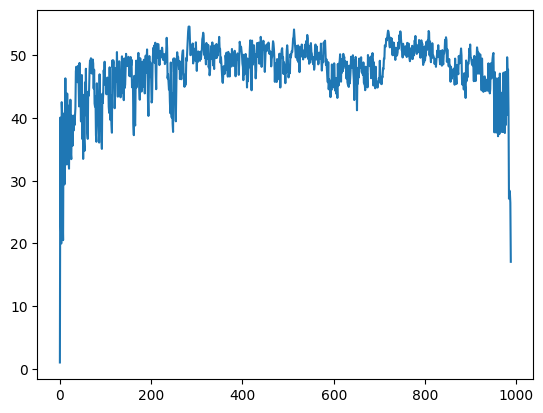

In [1005]:

plty = timbre_vals[126][:,0]
pltx = np.arange(len(plty))
durations = audio_analysis_df[audio_analysis_df.track_id=='01h4GiasOM9OqztIlAbUdJ'].duration.values
total_time = audio_analysis_df[audio_analysis_df.track_id=='01h4GiasOM9OqztIlAbUdJ'].end.values[-1]

plt.plot(pltx, plty)


In [492]:
track_audio_feats.iloc[[126],:]

,artist_name,artist_id,track_name,track_id,track_popularity,time_signature,duration_ms,tempo,valence,liveness,instrumentalness,acousticness,speechiness,mode,loudness,key,energy,danceability
126,Yeah Yeah Yeahs,3TNt4aUIxgfy9aoaft5Jj2,Wolf - Boy Harsher Remix,01h4GiasOM9OqztIlAbUdJ,45,4,265000,217.937,0.721,0.0686,0.745,0.00783,0.0293,1,-9.074,7,0.673,0.391


In [451]:
track_audio_feats[track_audio_feats.artist_name=='Scratch Massive']

,artist_name,artist_id,track_name,track_id,track_popularity,time_signature,duration_ms,tempo,valence,liveness,instrumentalness,acousticness,speechiness,mode,loudness,key,energy,danceability
28,Scratch Massive,5udXThiZTVoHa4g0GDjgxA,Take me there feat. Jimmy Somerville,4rU17etjV2A3ryXf4RlctA,37,4,242973,100.008,0.216,0.0880,0.0386,0.01250,0.0356,1,-5.533,7,0.799,0.553
76,Scratch Massive,5udXThiZTVoHa4g0GDjgxA,Break away,5zAh1M2awfXYNa1KNYKJKP,34,4,256400,219.981,0.499,0.0732,0.8150,0.00514,0.1610,0,-5.958,5,0.819,0.367
90,Scratch Massive,5udXThiZTVoHa4g0GDjgxA,Break Away - Live Version,4GSBxVmB1uTaDj5OQ3dyl4,5,4,491627,116.002,0.462,0.0722,0.8770,0.02480,0.0326,1,-8.347,0,0.837,0.585
121,Scratch Massive,5udXThiZTVoHa4g0GDjgxA,Take me there feat. Jimmy Somerville - Acid Wa...,0Wk1lCubfKP4FTrQ9rteLv,1,4,371051,109.968,0.151,0.1630,0.8490,0.02660,0.0306,1,-9.544,0,0.506,0.478


In [533]:
audio_analysis_df[audio_analysis_df.track_id=='01h4GiasOM9OqztIlAbUdJ'].copy()

,track_name,track_id,start,duration,end,confidence,loudness_start,loudness_max_time,loudness_max,loudness_end,attack_aggression,pitches,timbre
167062,Wolf - Boy Harsher Remix,01h4GiasOM9OqztIlAbUdJ,0.00000,0.24494,0.24494,0.000,-58.616,0.00849,-58.471,0.0,17.078916,"[1.0, 0.74, 0.041, 0.018, 0.031, 0.022, 0.02, ...","[1.033, 151.013, -29.743, -36.777, 30.673, -54..."
167063,Wolf - Boy Harsher Remix,01h4GiasOM9OqztIlAbUdJ,0.24494,0.28685,0.53179,1.000,-59.985,0.01257,-6.212,0.0,4277.883850,"[1.0, 0.52, 0.21, 0.637, 0.412, 0.471, 0.105, ...","[40.069, -4.569, -151.895, 142.467, -54.907, -..."
167064,Wolf - Boy Harsher Remix,01h4GiasOM9OqztIlAbUdJ,0.53179,0.13039,0.66218,0.389,-36.735,0.00568,-29.889,0.0,1205.281690,"[0.064, 0.109, 0.07, 0.07, 0.509, 0.509, 1.0, ...","[23.83, 90.989, -217.535, -39.102, 47.488, -10..."
167065,Wolf - Boy Harsher Remix,01h4GiasOM9OqztIlAbUdJ,0.66218,0.13188,0.79406,0.212,-41.346,0.00609,-35.196,0.0,1009.852217,"[0.016, 0.078, 0.072, 0.072, 0.518, 0.518, 1.0...","[19.992, 115.11, -213.895, -59.956, 48.176, -9..."
167066,Wolf - Boy Harsher Remix,01h4GiasOM9OqztIlAbUdJ,0.79406,0.55098,1.34504,1.000,-44.938,0.01745,-5.508,0.0,2259.598854,"[0.13, 0.042, 0.03, 0.073, 0.062, 0.073, 0.094...","[42.526, 99.169, -159.709, 146.022, -40.488, -..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
168046,Wolf - Boy Harsher Remix,01h4GiasOM9OqztIlAbUdJ,256.43560,0.30744,256.74304,0.141,-34.337,0.02422,-32.196,0.0,88.398018,"[0.024, 0.027, 0.054, 0.042, 0.8, 0.113, 0.043...","[27.138, 135.843, 93.748, 1.057, 69.805, -37.5..."
168047,Wolf - Boy Harsher Remix,01h4GiasOM9OqztIlAbUdJ,256.74304,0.20327,256.94631,0.310,-33.065,0.07728,-29.353,0.0,48.033126,"[0.01, 0.01, 0.027, 0.03, 0.672, 0.03, 0.031, ...","[28.432, 146.325, 94.165, -6.564, 69.085, -19...."
168048,Wolf - Boy Harsher Remix,01h4GiasOM9OqztIlAbUdJ,256.94630,1.24218,258.18848,0.399,-33.119,0.07279,-29.280,0.0,52.740761,"[0.004, 0.004, 0.009, 0.034, 0.844, 0.034, 0.0...","[28.059, 160.885, 87.285, 29.194, 61.054, -30...."
168049,Wolf - Boy Harsher Remix,01h4GiasOM9OqztIlAbUdJ,258.18848,0.24989,258.43837,0.052,-34.471,0.04240,-32.109,0.0,55.707547,"[0.002, 0.002, 0.006, 0.004, 0.674, 0.069, 0.0...","[26.475, 203.103, 130.154, 29.492, 73.898, -25..."


In [393]:
import numpy as np

def get_nearest_objects(object_features, seed_index, DD, n=10, k=3, ascending=True):
    # Initialize variables to store selected indices and visited nodes
    selected_indices = []
    visited = set()

    def dfs(node):
        nonlocal selected_indices, visited

        # Add the current node to the selected indices
        selected_indices.append(node)
        visited.add(node)
        if len(selected_indices)==n:
            return

        # Sort the neighbors of the current node by feature value
        neighbors = np.argsort(DD[node])[:k]

        # Find the smallest neighbor node with a feature value greater than the current node's feature value
        smallest_neighbor = None
        # print('At node %d - feature value %.3f'%(node, object_features[node]))
        for neighbor in neighbors:
            # print('neighbor %d - feature value %.3f'%(neighbor, object_features[neighbor]))
            if neighbor not in visited and object_features[neighbor] > object_features[node]-.5:
                # print(neighbor)
                if smallest_neighbor is None or object_features[neighbor] < object_features[smallest_neighbor]:
                    smallest_neighbor = neighbor

        # Recursively visit the smallest neighbor node if found
        if smallest_neighbor is not None:
            dfs(smallest_neighbor)

    # Perform depth-first search from the seed node
    dfs(seed_index)

    return selected_indices[:n]

# Example usage:
# Assuming track_audio_feats is your DataFrame containing features and DD is your distance matrix
track_features = track_audio_feats.tempo.tolist()
seed_index = 28 # Index of the seed track
D = D_timbre+D_pitch

result = get_nearest_objects(track_features, seed_index, D, n=10, k=3, ascending=True)
print("Selected object indices:", result)


Selected object indices: [28, 171, 175, 177, 113, 114, 134, 141]


In [394]:
track_audio_feats.iloc[result,:]

,artist_name,artist_id,track_name,track_id,track_popularity,time_signature,duration_ms,tempo,valence,liveness,instrumentalness,acousticness,speechiness,mode,loudness,key,energy,danceability
28,Scratch Massive,5udXThiZTVoHa4g0GDjgxA,Take me there feat. Jimmy Somerville,4rU17etjV2A3ryXf4RlctA,37,4,242973,100.008,0.216,0.0880,0.0386,0.012500,0.0356,1,-5.533,7,0.799,0.553
171,Death In Vegas,5aj3LEYRbuaabjjHkj5oE1,Your Loft My Acid - Fearless Transhouse Single...,3VEzJq61QhUKUydxuenyui,17,4,191400,107.982,0.165,0.5260,0.2660,0.000933,0.0302,1,-9.115,7,0.547,0.616
175,bel canto,5Bz8k8phXRsAtBB6xrIR83,Birds of Passage,1avEnJ4xJyescw7InVgjz2,16,4,326227,114.100,0.596,0.1070,0.4610,0.227000,0.0354,1,-12.269,7,0.620,0.616
177,The Juan Maclean,7gG6LkU3pCSQmCIPR4aSBt,A Simple Design,2AkGZm4Uftzck1CITgNK60,32,4,432160,114.002,0.691,0.0683,0.1800,0.021600,0.0332,0,-5.429,9,0.839,0.639
113,Agar Agar,5TkylUv5ysSbNoawmn3PBj,Prettiest Virgin,50BnNFFUO9kmsq4HRBtk2o,0,4,374956,120.022,0.575,0.0833,0.5670,0.155000,0.0477,0,-9.522,0,0.494,0.905
114,Agar Agar,5TkylUv5ysSbNoawmn3PBj,Prettiest Virgin,6qRRWAS0O5nVozv6zswETq,51,4,373992,120.023,0.562,0.0799,0.6370,0.225000,0.0501,1,-8.853,8,0.487,0.915
134,Dot Allison,69IZoi4l9e7KcUpbgP9K7e,Substance - Felix Da Housecat Remix,5w6Z8pIPnxZwtD8t92l79a,0,3,472280,124.994,0.624,0.1260,0.7950,0.000094,0.0404,1,-10.620,0,0.526,0.655
141,Maud Geffray,0PyyoamnJX4tdrSf8r6dij,Break,7tTE7TZ7oacg2tvB0gy3FQ,0,4,231027,138.014,0.177,0.3920,0.1530,0.000808,0.0291,0,-8.402,2,0.599,0.487


In [395]:
i = 134
print(np.argsort(D[i])[:3])
print(np.array(track_audio_feats.tempo.values)[np.argsort(D[i])[:3]])

[170 171 141]
[ 97.914 107.982 138.014]


In [446]:
check_df.end>

186261      0.13946
186262      0.24168
186263      0.33420
186264      0.50431
186265      0.60318
            ...    
187684    275.04656
187685    275.77160
187686    276.37550
187687    276.51493
187688    280.29333
Name: end, Length: 1428, dtype: float64

In [429]:
track_ids = track_audio_feats.track_id.tolist()
np.where(np.array([(audio_analysis_df[audio_analysis_df.track_id==t].loudness_max_time==0).sum() for t in track_ids])==2)

(array([ 54,  93,  97, 103, 113, 139]),)

In [443]:
check_df = audio_analysis_df[audio_analysis_df.track_id==track_ids[139]].copy()
check_df#[check_df.loudness_max_time==0]

,track_name,track_id,start,duration,end,confidence,loudness_start,loudness_max_time,loudness_max,loudness_end,attack_aggression,pitches,timbre
186261,Polaar (Nite Session),5mzUFd5ciwE90BE9hFhXRe,0.00000,0.13946,0.13946,0.000,-60.000,0.00000,-60.000,0.0,NaN,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[0.756, 170.09, 22.284, -48.379, 54.679, -60.8..."
186262,Polaar (Nite Session),5mzUFd5ciwE90BE9hFhXRe,0.13946,0.10222,0.24168,1.000,-60.000,0.01391,-23.257,0.0,2641.480949,"[0.726, 0.735, 0.199, 0.176, 0.406, 0.412, 0.7...","[32.055, -129.532, -23.043, 38.328, 26.403, -7..."
186263,Polaar (Nite Session),5mzUFd5ciwE90BE9hFhXRe,0.24168,0.09252,0.33420,0.429,-32.437,0.02218,-26.231,0.0,279.801623,"[0.263, 0.279, 0.262, 0.265, 0.276, 0.27, 0.81...","[31.639, -108.444, -77.021, -34.41, 45.999, -4..."
186264,Polaar (Nite Session),5mzUFd5ciwE90BE9hFhXRe,0.33420,0.17011,0.50431,0.850,-29.370,0.05164,-18.515,0.0,210.205267,"[0.084, 0.118, 0.1, 0.14, 0.226, 0.207, 0.679,...","[35.867, -107.505, -126.783, -70.242, 65.249, ..."
186265,Polaar (Nite Session),5mzUFd5ciwE90BE9hFhXRe,0.50431,0.09887,0.60318,0.741,-26.485,0.00353,-14.802,0.0,3309.631728,"[0.159, 0.202, 0.202, 0.314, 0.562, 0.472, 0.7...","[37.665, -83.111, -110.289, 17.661, 16.876, -1..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
187684,Polaar (Nite Session),5mzUFd5ciwE90BE9hFhXRe,274.69790,0.34866,275.04656,0.166,-50.216,0.06590,-47.322,0.0,43.915023,"[0.035, 0.027, 0.148, 0.128, 0.022, 0.037, 0.1...","[9.855, 62.416, 121.297, 61.175, 115.748, -46...."
187685,Polaar (Nite Session),5mzUFd5ciwE90BE9hFhXRe,275.04657,0.72503,275.77160,0.400,-53.915,0.02785,-50.433,0.0,125.026930,"[0.054, 0.049, 0.089, 0.061, 0.042, 0.056, 0.1...","[7.727, 92.862, 101.769, 54.202, 96.213, -52.0..."
187686,Polaar (Nite Session),5mzUFd5ciwE90BE9hFhXRe,275.77160,0.60390,276.37550,0.468,-57.507,0.03737,-53.460,0.0,108.295424,"[0.123, 0.11, 0.12, 0.084, 0.087, 0.122, 0.196...","[4.024, 132.277, 56.51, 34.773, 75.192, -39.74..."
187687,Polaar (Nite Session),5mzUFd5ciwE90BE9hFhXRe,276.37552,0.13941,276.51493,1.000,-59.996,0.00000,-59.996,0.0,NaN,"[0.447, 0.816, 0.599, 0.839, 0.865, 1.0, 0.625...","[0.006, 171.154, 9.661, -28.617, 57.364, -50.1..."


In [408]:
audio_analysis_df[audio_analysis_df.track_id=='5w6Z8pIPnxZwtD8t92l79a'].iloc[:10,:]
# audio_analysis_df[audio_analysis_df.track_id=='7tTE7TZ7oacg2tvB0gy3FQ'].iloc[:5,:]

,track_name,track_id,start,duration,end,confidence,loudness_start,loudness_max_time,loudness_max,loudness_end,attack_aggression,pitches,timbre
189024,Break,7tTE7TZ7oacg2tvB0gy3FQ,0.00000,0.16263,0.16263,0.000,-60.000,0.00000,-60.000,0.0,NaN,"[0.979, 1.0, 0.491, 0.483, 0.454, 0.447, 0.414...","[0.0, 171.123, 9.475, -28.488, 57.499, -50.072..."
189025,Break,7tTE7TZ7oacg2tvB0gy3FQ,0.16263,0.09878,0.26141,1.000,-60.000,0.07537,-24.466,0.0,471.460793,"[0.792, 0.616, 0.605, 0.72, 0.489, 0.417, 0.46...","[26.423, 227.087, 223.253, -115.279, 132.093, ..."
189026,Break,7tTE7TZ7oacg2tvB0gy3FQ,0.26141,0.29583,0.55724,0.917,-24.515,0.09281,-12.312,0.0,131.483676,"[0.025, 0.029, 0.178, 0.232, 0.222, 0.027, 0.0...","[42.388, 135.49, 149.313, -1.472, 124.455, 4.5..."
189027,Break,7tTE7TZ7oacg2tvB0gy3FQ,0.55723,0.14526,0.70249,0.321,-19.067,0.07351,-14.073,0.0,67.936335,"[0.032, 0.047, 0.186, 0.076, 0.101, 0.058, 0.0...","[44.51, 141.255, 111.265, 1.486, 100.948, -25...."
189028,Break,7tTE7TZ7oacg2tvB0gy3FQ,0.70249,0.18608,0.88857,0.156,-16.900,0.05639,-13.487,0.0,60.524916,"[0.084, 0.028, 0.071, 0.131, 0.623, 1.0, 0.083...","[43.556, 50.63, 54.003, 24.491, 83.487, -29.69..."


In [118]:
# inpect_X.sort_values(by = ['pair', 'tempo'], ascending = False)
# inpect_X['MinVal'] = inpect_X.groupby('pair')['tempo'].transform('min')
# # Sort the DataFrame based on the max value within each pair
# inpect_X = inpect_X.sort_values(by='MinVal')
# inpect_X.drop(columns='MinVal', inplace=True)

# inpect_X.head(10)

In [137]:
# D = D_timbre

#get k low and high sliding diff pairs
k=10
k_low_diffs = np.sort(D.flatten())[:k]
print('%s low sliding diffs: '%k, k_low_diffs)
ix_inspect_low = [np.unravel_index(ix, D.shape) for ix in np.argsort(D.flatten())[:k]]
print('at ix pairs: ', ix_inspect_low)
#get largest 5 sliding diffs
k_high_diffs = np.sort(np.nan_to_num(D, posinf=0).flatten())[::-1][:k]
print('%s high sliding diffs: '%k, k_high_diffs)
ix_inspect_high = [np.unravel_index(ix, D.shape) for ix in np.argsort(np.nan_to_num(D, posinf=0).flatten())[::-1][:k]]
print('at ix pairs: ', ix_inspect_high)

track_audio_feats.iloc[list(sum(ix_inspect_low, ())),:]

10 low sliding diffs:  [0.         0.36372285 0.45981826 0.48616868 0.54056664 0.54343071
 0.54361056 0.54532218 0.55172827 0.55476455]
at ix pairs:  [(160, 161), (81, 151), (70, 121), (121, 171), (70, 171), (26, 39), (121, 144), (28, 121), (46, 144), (46, 121)]
10 high sliding diffs:  [1.18503129 1.11742015 1.1154603  1.10791863 1.10289632 1.09311402
 1.09180752 1.08807203 1.08674228 1.08176478]
at ix pairs:  [(39, 124), (39, 130), (46, 124), (39, 122), (17, 124), (124, 154), (82, 124), (26, 124), (124, 141), (77, 82)]


,artist_name,artist_id,track_name,track_id,track_popularity,time_signature,duration_ms,tempo,valence,liveness,instrumentalness,acousticness,speechiness,mode,loudness,key,energy,danceability
160,Sam Quealy,0GLGeVG3XTA2KmlmAd05T8,Watch Me Now (Queen of the night),4MOIEJR5YLM10ZKmhn7yrZ,35,4,192187,130.020,0.628,0.2460,0.000254,0.020500,0.0365,1,-5.451,0,0.7230,0.686
161,Sam Quealy,0GLGeVG3XTA2KmlmAd05T8,Watch Me Now,1NEXEw8ZdsMdnoVTQbkbTo,45,4,192187,130.020,0.628,0.2460,0.000254,0.020500,0.0365,1,-5.451,0,0.7230,0.686
81,Nina Kraviz,1oZmFNkGAT93yD1xX4vTRE,I'm Gonna Get You,1LaZ2aGugrXacj39qCnSQU,0,4,598081,119.999,0.652,0.0707,0.651000,0.049000,0.0771,0,-9.552,4,0.5180,0.808
151,Nina Kraviz,1oZmFNkGAT93yD1xX4vTRE,I'm Gonna Get You,4Tv3LlZQWvl5AC4t2p6tdc,44,4,598093,120.003,0.655,0.0707,0.655000,0.049000,0.0765,0,-9.549,4,0.5190,0.808
70,Soldout,5g40eoVT3f0lZbIa1mGbzs,Fake - Maya Postepski Remix,03EzjNFCjhIt94UbjNF5fz,5,4,395218,124.016,0.136,0.0799,0.006210,0.004830,0.0292,1,-4.801,1,0.8630,0.618
121,Scratch Massive,5udXThiZTVoHa4g0GDjgxA,Take me there feat. Jimmy Somerville - Acid Wa...,0Wk1lCubfKP4FTrQ9rteLv,1,4,371051,109.968,0.151,0.1630,0.849000,0.026600,0.0306,1,-9.544,0,0.5060,0.478
121,Scratch Massive,5udXThiZTVoHa4g0GDjgxA,Take me there feat. Jimmy Somerville - Acid Wa...,0Wk1lCubfKP4FTrQ9rteLv,1,4,371051,109.968,0.151,0.1630,0.849000,0.026600,0.0306,1,-9.544,0,0.5060,0.478
171,Death In Vegas,5aj3LEYRbuaabjjHkj5oE1,Your Loft My Acid - Fearless Transhouse Single...,3VEzJq61QhUKUydxuenyui,17,4,191400,107.982,0.165,0.5260,0.266000,0.000933,0.0302,1,-9.115,7,0.5470,0.616
70,Soldout,5g40eoVT3f0lZbIa1mGbzs,Fake - Maya Postepski Remix,03EzjNFCjhIt94UbjNF5fz,5,4,395218,124.016,0.136,0.0799,0.006210,0.004830,0.0292,1,-4.801,1,0.8630,0.618
171,Death In Vegas,5aj3LEYRbuaabjjHkj5oE1,Your Loft My Acid - Fearless Transhouse Single...,3VEzJq61QhUKUydxuenyui,17,4,191400,107.982,0.165,0.5260,0.266000,0.000933,0.0302,1,-9.115,7,0.5470,0.616


(32, 61)

In [63]:

# track_audio_feats.iloc[list(ix_inspect_low[0]),:]
timbre_vals[48].shape

(1997, 12)

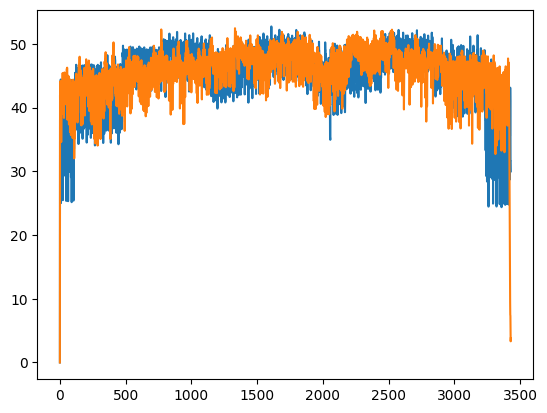

In [13]:
c=0
i=0
# x1 = timbre_vals[ix_inspect_low[i][0]][:,c]
# x2 = timbre_vals[ix_inspect_low[i][1]][:,c]

# x1 = timbre_vals[ix_inspect_high[i][0]][:,c]
# x2 = timbre_vals[ix_inspect_high[i][1]][:,c]

x1 = timbre_vals[51][:,c]
x2 = timbre_vals[11][:,c]

x1_resampled = resample_to_match_length(x1.reshape((-1,1)), len(x2), method='nearest').flatten()

# plt.plot(np.arange(len(x1)), x1)
plt.plot(np.arange(len(x1_resampled)), x1_resampled) 
plt.plot(np.arange(len(x2)), x2)

# plt.axhline(y=np.median(x2), color='r', linestyle='--', label='Constant Line')
# plt.axhline(y=np.median(x2)-k*np.std(x2), color='r', linestyle='--', label='Constant Line')
# plt.axhline(y=np.max(x2), color='r', linestyle='--', label='Constant Line')

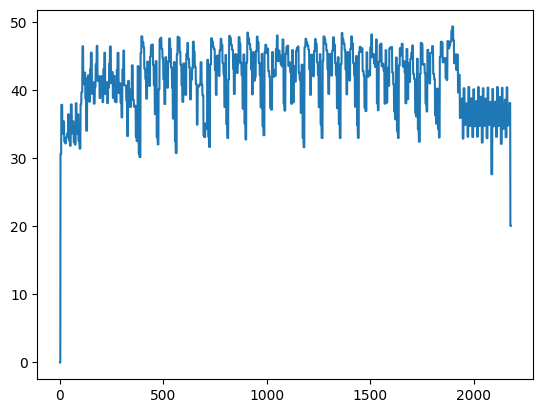

In [10]:
# x1 = timbre_vals[32]
# x2 = timbre_vals[61]

# x2_resampled = resample_to_match_length(x2, len(x1))
plt.plot(np.arange(len(x1_resampled)), x1_resampled) 

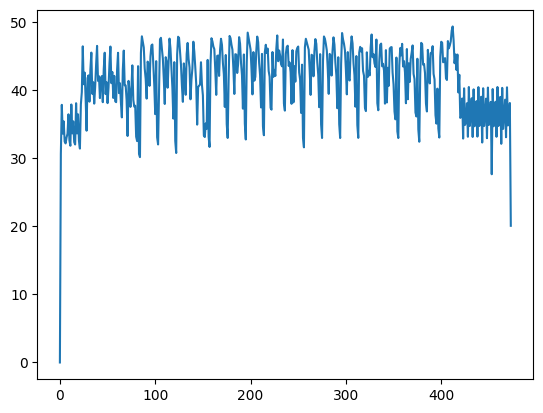

In [11]:
plt.plot(np.arange(len(x1)), x1) 

In [88]:
x = timbre_vals[ix_inspect_low[0][0]]
x[:2,:].shape

(2, 12)

In [29]:
# import numpy as np
# from scipy.fftpack import dct, idct
# ##reconstructed frequency spectrum obtained from inverse Discrete Cosine Transform (IDCT) 
# ##on the 12 Mel-Frequency Cepstral Coefficients (MFCCs) == linear combination of the basis vectors 
# ##using the 12 MFCC coefficients

# # Set of 12 MFCC coefficients 
# mfcc_coefficients = x[:1,:]

# # Define the number of MFCC coefficients (usually 12)
# num_mfcc_coefficients = mfcc_coefficients.shape[1] #len(mfcc_coefficients)

# # Perform the inverse Discrete Cosine Transform (IDCT) to recover the basis vectors
# reconstructed_frequency_spectrum = idct(mfcc_coefficients, norm='ortho')

# # Normalize the reconstructed frequency spectrum (optional)
# normalized_reconstructed_spectrum = reconstructed_frequency_spectrum / np.max(np.abs(reconstructed_frequency_spectrum))

# # Now you have the reconstructed frequency spectrum, which represents the basis vectors associated with the MFCC coefficients
# reconstructed_frequency_spectrum

In [753]:
k=.5
x = timbre_vals[ix_inspect_high[0][1]]
median = np.median(x, axis=0)
std = np.std(x,axis=0)
v_min = median-k*std
v_min

array([  29.36223043,    9.53752282, -109.18804   ,   16.21917704,
        -21.21182306,  -64.03676361,  -17.64208766,  -19.38978254,
        -23.17402722,   -7.81582107,  -31.37222731,   -6.39171704])

In [758]:
np.argmax(x>=v_min, axis=0)


array([30, 40, 11, 15,  0,  0,  0,  0,  0,  0,  0,  0])

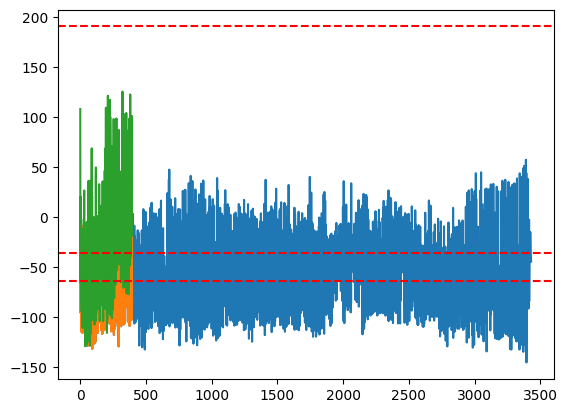

In [760]:
c=5
x1 = timbre_vals[ix_inspect_high[0][0]][:,c]
x2 = timbre_vals[ix_inspect_high[0][1]][:,c]
pltx1, t1 = cut_ts_ends(x1, k=np.inf, begin=False, end=False)

t_begin = 0
# t_end = np.where((x>=v_min).all(1))[0][-1]
t_end = np.where(x[:,0]>=v_min[0])[0][-1]

t2 = np.arange(t_begin, t_end+1)
pltx2 = x2[t_begin:t_end+1]

len_y = len(pltx2)
t1_begin = lag
t1_end = len_y+lag
t1=t1[t1_begin:t1_end]
pltx1=pltx1[t1]

plt.plot(np.arange(len(x1)), x1)
plt.plot(t1,pltx1)
plt.plot(t1,pltx2)
plt.axhline(y=np.median(x2), color='r', linestyle='--', label='Constant Line')
plt.axhline(y=np.median(x2)-k*np.std(x2), color='r', linestyle='--', label='Constant Line')
plt.axhline(y=np.max(x2), color='r', linestyle='--', label='Constant Line')


In [780]:
x = x[:,0]
if x.ndim == 1:
    x = x.reshape((-1,1))

x.shape

(408, 1)

In [849]:
x=timbre_vals[ix_inspect_high[0][1]]
x

array([[  16.934,  -88.047, -148.066, ...,  113.825,   14.818,   -4.255],
       [  20.158, -199.941, -179.055, ...,   -5.905,   13.297,  -12.707],
       [  16.075, -142.642, -151.733, ...,   57.958,  -38.824,    3.007],
       ...,
       [  25.662,  -74.624, -155.842, ...,   -9.36 ,  -29.126,  -11.827],
       [  11.279,   93.126,  -93.119, ...,  -22.561,  -14.981,  -20.014],
       [  19.113,  -20.666, -101.041, ...,  -52.867,    2.085,   -4.096]])

In [841]:
np.argmax(trim_cond[::-1], axis=0)

array([13,  1,  0,  0,  0,  3,  1,  0,  0,  6,  0,  0])

In [844]:
x=timbre_vals[ix_inspect_high[0][1]]

median = np.median(x, axis=0)
std = np.std(x, axis=0)
v_min = median-k*std
trim_cond = x>=v_min

#get first time where x >= min bd - defaults to first dim
t_begin = np.argmax(trim_cond, axis=0)[0]
#if we want first time where all dimensions exceed their min bd
t_begin = np.argmax(trim_cond, axis=0).max()

#get final time where x >= min bd - defaults to first dim
t_end = len(x) - 1 - np.argmax(trim_cond[::-1], axis=0)[0]
#if we want final time where all dimensions exceed their min bd
t_end = len(x) - 1 - np.argmax(trim_cond[::-1], axis=0).max()

print('begin t=%d, end t=%d'%(t_begin, t_end))

begin t=40, end t=394


In [853]:
for j in range(x.shape[1]):
    print(j)
    x_flat=x[:,j].flatten()
    median = np.median(x_flat)
    std = np.std(x_flat)
    v_min = median-k*std
    t_begin = np.where(x_flat>=v_min)[0][0]
    t_end = np.where(x_flat>=v_min)[0][-1]
    print('begin t=%d, end t=%d'%(t_begin, t_end))

0
begin t=30, end t=394
1
begin t=40, end t=406
2
begin t=11, end t=407
3
begin t=15, end t=407
4
begin t=0, end t=407
5
begin t=0, end t=404
6
begin t=0, end t=406
7
begin t=0, end t=407
8
begin t=0, end t=407
9
begin t=0, end t=401
10
begin t=0, end t=407
11
begin t=0, end t=407


begin


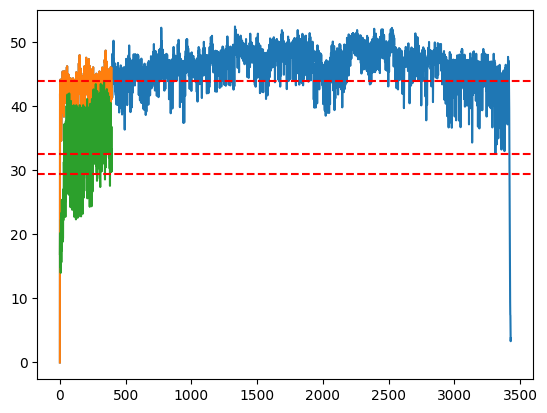

In [867]:
import matplotlib.pyplot as plt

k=.5

x1 = timbre_vals[ix_inspect_high[0][0]][:,0]
x2 = timbre_vals[ix_inspect_high[0][1]][:,0]

pltx1, t1 = cut_ts_ends(x1, k=np.inf, begin=False, end=False)
x2_begin, t2_begin = cut_ts_ends(x2, k=k, begin=False, end=True)
x2_middle, t2_middle = cut_ts_ends(x2, k=k, begin=True, end=True)
x2_end, t2_end = cut_ts_ends(x2, k=k, begin=True, end=False)

max_lag = len(x1)-len(t2_end)+1

#for lag in range(max_lag):
lag=0 #max_lag-1 #3054

if lag==0:
    print('begin')
    # pltx2, t2 = cut_ts_ends(x2, k=k, begin=False, end=True)
    pltx2, t2 = x2_begin, t2_begin
elif lag==max_lag-1:
    print('end')
    # pltx2, t2 = cut_ts_ends(x2, k=k, begin=True, end=False)
    pltx2, t2 = x2_end, t2_end
else:
    print('middle')
    # pltx2, t2 = cut_ts_ends(x2, k=k, begin=True, end=True)
    pltx2, t2 = x2_middle, t2_middle


len_y = len(pltx2)
t1_begin = lag
t1_end = len_y+lag
t1=t1[t1_begin:t1_end]
pltx1=pltx1[t1]
# plt.plot(t2,pltx1)
plt.plot(np.arange(len(x1)), x1)
plt.plot(t1,pltx1)
plt.plot(t1,pltx2)
plt.axhline(y=np.median(x2), color='r', linestyle='--', label='Constant Line')
plt.axhline(y=np.median(x2)-k*np.std(x2), color='r', linestyle='--', label='Constant Line')
plt.axhline(y=np.max(x2), color='r', linestyle='--', label='Constant Line')

In [686]:
t1

array([2500, 2501, 2502, 2503, 2504, 2505, 2506, 2507, 2508, 2509, 2510,
       2511, 2512, 2513, 2514, 2515, 2516, 2517, 2518, 2519, 2520, 2521,
       2522, 2523, 2524, 2525, 2526, 2527, 2528, 2529, 2530, 2531, 2532,
       2533, 2534, 2535, 2536, 2537, 2538, 2539, 2540, 2541, 2542, 2543,
       2544, 2545, 2546, 2547, 2548, 2549, 2550, 2551, 2552, 2553, 2554,
       2555, 2556, 2557, 2558, 2559, 2560, 2561, 2562, 2563, 2564, 2565,
       2566, 2567, 2568, 2569, 2570, 2571, 2572, 2573, 2574, 2575, 2576,
       2577, 2578, 2579, 2580, 2581, 2582, 2583, 2584, 2585, 2586, 2587,
       2588, 2589, 2590, 2591, 2592, 2593, 2594, 2595, 2596, 2597, 2598,
       2599, 2600, 2601, 2602, 2603, 2604, 2605, 2606, 2607, 2608, 2609,
       2610, 2611, 2612, 2613, 2614, 2615, 2616, 2617, 2618, 2619, 2620,
       2621, 2622, 2623, 2624, 2625, 2626, 2627, 2628, 2629, 2630, 2631,
       2632, 2633, 2634, 2635, 2636, 2637, 2638, 2639, 2640, 2641, 2642,
       2643, 2644, 2645, 2646, 2647, 2648, 2649, 26

In [619]:
len(x1)-len(t2_end)+1

3054

-inf
29.362230426849678


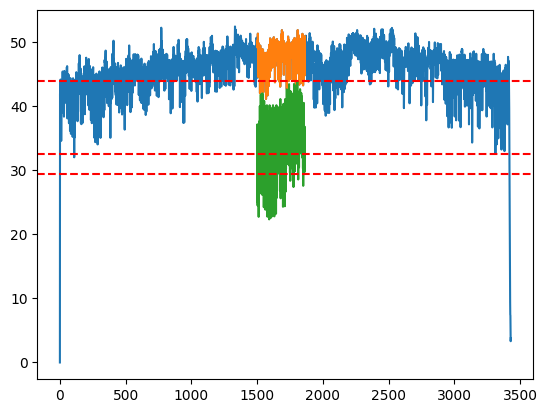

In [600]:
pltx1, t1 = cut_ts_ends(x1, k=np.inf, begin=False, end=False)
k=.5
#t=0
# pltx2, t2 = cut_ts_ends(x2, k=k, begin=False, end=True)

# t1=t1[:len(t2)]
# pltx1=pltx1[t1]


#t>0, t<t_end
lag=1500
pltx2, t2 = cut_ts_ends(x2, k=k, begin=True, end=True)

t1=t1[lag:len(t2)+lag]
pltx1=pltx1[lag:len(t2)+lag]


# #t=t_end
pltx2, t2 = cut_ts_ends(x2, k=k, begin=False, end=True)
# t1=t1[:len(t2)]
# pltx1=pltx1[t1]

plt.plot(np.arange(len(x1)), x1)
plt.plot(t1,pltx1)
plt.plot(t1,pltx2)

plt.axhline(y=np.median(x2), color='r', linestyle='--', label='Constant Line')
plt.axhline(y=np.median(x2)-k*np.std(x2), color='r', linestyle='--', label='Constant Line')
plt.axhline(y=np.max(x2), color='r', linestyle='--', label='Constant Line')

In [570]:
len(x1)-2

3429

In [385]:
median = np.median(x2)
std = np.std(x2)
v_min = median-k*std
print(v_min)
t_begin = np.where(x2>=v_min)[0][0]
t_end = len(x2)

print(t_begin)
print(t_end)

26.222460853699356
25
408


In [390]:
(x2[t_begin:]==pltx2).all()

True

In [398]:
pltx1[-10:]

array([25.784, 23.92 , 18.251, 13.394,  9.407,  7.455,  7.338,  4.294,
        3.321,  3.8  ])

In [399]:
x1[-10:]

array([25.784, 23.92 , 18.251, 13.394,  9.407,  7.455,  7.338,  4.294,
        3.321,  3.8  ])

In [253]:

#if lag == 0: cut end from y (shorter time series)
#elif lag==max_lag: cut begin from y (shorter time series)
#else: cut both begin and end from y (shorter time series)

30

In [256]:


max_lag = len(pltx1)-len(pltx2)+1
# print(max_lag)
len_y = len(pltx2)
lag=0




In [ ]:
# from sklearn.decomposition import PCA
# from sklearn.manifold import TSNE
# from sklearn.preprocessing import scale, normalize
# import numpy as np
# import matplotlib.pyplot as plt
# from sklearn.datasets import make_blobs
# from sklearn.preprocessing import StandardScaler
# from sklearn.cluster import KMeans
# from sklearn.decomposition import PCA
# from sklearn.manifold import TSNE
# feature_cols = ['tempo', 'valence', 'liveness', 'instrumentalness', 'acousticness',
#        'speechiness',  'energy', 'danceability', 'loudness']

# cont_feat_cols = ['tempo', 'valence', 'liveness', 'instrumentalness', 'acousticness',
#        'speechiness', 'energy', 'danceability', 'loudness']
# disc_feat_cols = ['time_signature', 'mode', 'key']

# pca = PCA(n_components=2)

# # X = feature_df.values
# # X = track_audio_feats[feature_cols].values
# X_cont = track_audio_feats[cont_feat_cols].values
# X_disc = track_audio_feats[disc_feat_cols].values

# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X_cont)
# X_scaled = np.concatenate((X_scaled, X_disc), axis=1)

# # Reduce data dimensionality with PCA
# pca = PCA(n_components=2)
# X_pca = pca.fit_transform(X_scaled)

# # Apply K-means clustering
# k = 3 # Choose the number of clusters
# kmeans = KMeans(n_clusters=k)
# kmeans.fit(X_pca)

# # Predict cluster labels
# y_pred = kmeans.labels_
# y_pred

In [ ]:
# Plot the clusters in reduced-dimensional space
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_pred, cmap='viridis', s=50, alpha=0.7)
plt.scatter(X_pca[1,0], X_pca[1,1], c='red')
plt.title('K-means Clustering with TSNE')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster')
plt.show()

In [ ]:
np.where((X_pca[:,0] <-4) & (X_pca[:,1] > .75) & (X_pca[:,1] < 1.5))

In [ ]:
track_audio_feats.iloc[[1,33,47],:]

In [ ]:
# # Reduce data dimensionality with t-SNE
# tsne = TSNE(n_components=2)
# X_tsne = tsne.fit_transform(X_scaled)


# # Apply K-means clustering
# k = 3 # Choose the number of clusters
# kmeans = KMeans(n_clusters=k)
# kmeans.fit(X_tsne)

# # Predict cluster labels
# y_pred = kmeans.labels_


# # Plot the clusters in reduced-dimensional space
# plt.figure(figsize=(8, 6))
# plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y_pred, cmap='viridis', s=50, alpha=0.7)
# plt.title('K-means Clustering with TSNE')
# plt.xlabel('TSNE Component 1')
# plt.ylabel('TSNE Component 2')
# plt.colorbar(label='Cluster')
# plt.show()